In [35]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra

In [36]:
ctx = straxbra.XebraContext()

In [37]:
run = '00191'
peaks_data = ctx.get_array(run, 'peaks')

In [38]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']

In [39]:
def PrintWaveform(waveform,i):

    fig, (ax1) = plt.subplots(1, 1, sharex=False, figsize=(12, 3.5))

    ax1.plot(waveform[i])

    plt.show()


In [40]:
def CutCondition(waveform, i):
    
    
    FirstPeak_area = sum(waveform[i][:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[i][15:]) # range in samples (not ns!)
    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [41]:
def Process(waveform, i):

    CutFlag = CutCondition(waveform, i)
    if CutFlag == True:
        Kr_S1_area.append(integral[i])
        Kr_S1_width.append(width[i])
        if PrintingFlag == True:
            PrintWaveform(waveform, i)

In [42]:
num = len(waveform)
Kr_S1_area = []
Kr_S1_width = []
PrintingFlag = False

for i in range(0,num):
    
    Process(waveform,i)

No handles with labels found to put in legend.


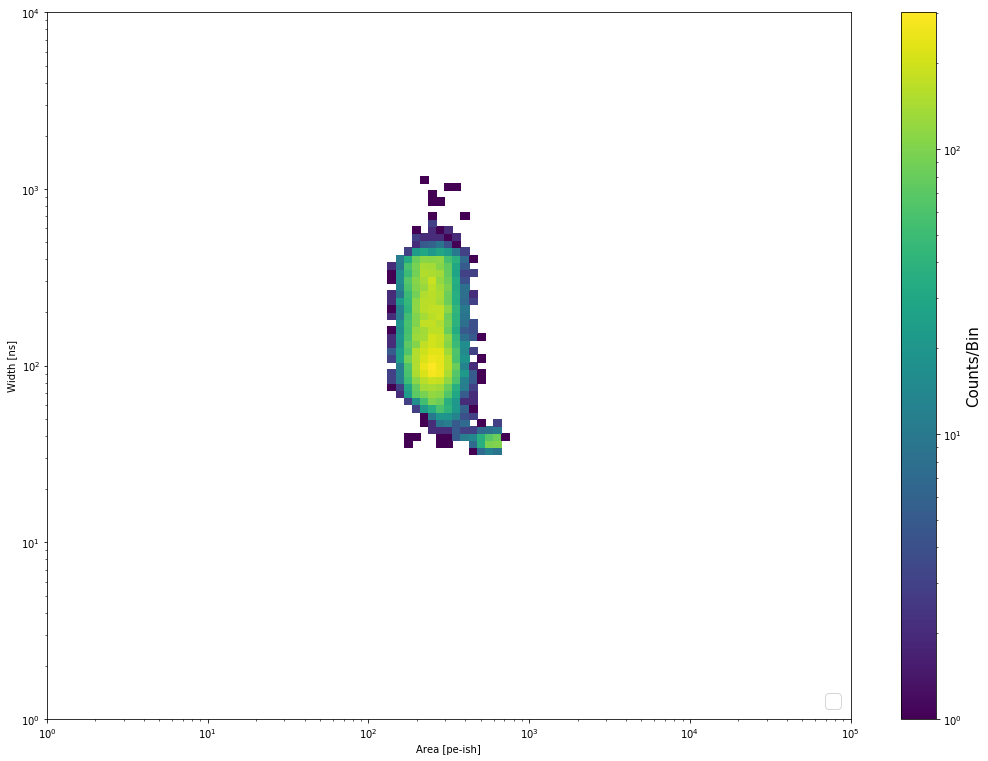

In [43]:
fig, ax  = plt.subplots( figsize=(18, 13))

bins_x = np.logspace(0,5,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3

counts, _, _ = np.histogram2d(Kr_S1_area, Kr_S1_width, bins=(bins_x, bins_y))


im = ax.pcolormesh(bins_x, bins_y, counts.T, cmap='viridis', norm=mcolors.LogNorm())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Area [pe-ish]')
ax.set_ylabel('Width [ns]')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(label ='Counts/Bin', fontsize=15)
plt.legend(loc =4,prop={'size': 20})

